In [1]:
import numpy as np
import random

In [42]:
def decimal_to_binary(array, precision_bits):
    """
    Convert a NumPy array to a binary string.
    
    Args:
        - array (numpy.ndarray): Input array of float or int values.
        - precision_bits (list of tuples): List of tuples containing (min_val, max_val, bits) for each element to define the precision.
            - min_val (float): The minimum possible value of the original range for the element.
            - max_val (float): The maximum possible value of the original range for the element.
            - bits (int): The number of bits used to represent the element in the binary string. 
    Returns:
        - binary_string (str): Binary string representing the array.
    """
    
    binary_string = ''.join(
        f'{int((val - min_val) / (max_val - min_val) * ((1 << bits) - 1)):0{bits}b}'
        for val, (min_val, max_val, bits) in zip(array, precision_bits)
    )
    
    return binary_string

In [43]:
array = np.array([0.32, 50, 0.25, 0.75])
precision_bits = [(0, 1, 8), (0, 100, 10), (0, 1, 8), (0, 1, 8)]
binary_string = decimal_to_binary(array, precision_bits)
print(type(binary_string))
print(binary_string)

<class 'str'>
0101000101111111110011111110111111


In [44]:
def binary_to_decimal(binary_string, precision_bits):
    """
    Convert a binary string back to a NumPy array.
    
    Args:
        - binary_string (str): Binary string to be converted.
        - precision_bits (list of tuples): List of tuples containing (min_val, max_val, bits) for each element to define the precision.
            - min_val (float): The minimum possible value of the original range for the element.
            - max_val (float): The maximum possible value of the original range for the element.
            - bits (int): The number of bits used to represent the element in the binary string.
    
    Returns:
        - arr (numpy.ndarray): Array of float or int values represented by the binary string.
    """
    
    arr = []
    index = 0
    
    for min_val, max_val, bits in precision_bits:
        
        segment = binary_string[index:index + bits]
        int_value = int(segment, 2)
        max_int_value = (1 << bits) - 1
        real_value = min_val + (max_val - min_val) * (int_value / max_int_value)
        arr.append(real_value)
        index += bits
        
    return np.array(arr)

In [45]:
array = binary_to_decimal(binary_string, precision_bits)
print(type(array))
print(array)

<class 'numpy.ndarray'>
[ 0.31764706 49.95112414  0.24705882  0.74901961]


In [46]:
array1 = np.array([0.32, 50, 0.25, 0.75, 23, 43, 54, 98, 78, 90, .3])
precision_bits1 = [(0, 1, 8), (0, 100, 10), (0, 1, 8), (0, 1, 8), (0, 100, 10), (0, 100, 10), (0, 100, 10), (0, 100, 10), (0, 100, 10), (0, 100, 10), (0,1, 8)]
binary_string1 = decimal_to_binary(array1, precision_bits1)
print(len(binary_string1))

102


In [47]:
array2 = binary_to_decimal(binary_string1, precision_bits1)
array2

array([ 0.31764706, 49.95112414,  0.24705882,  0.74901961, 22.971652  ,
       42.91300098, 53.95894428, 97.94721408, 77.90811339, 89.9315738 ,
        0.29803922])

In [48]:
def initialize_population(pop_size, bit_length):
    return [''.join(random.choice('01') for _ in range(bit_length)) for _ in range(pop_size)]


In [50]:
g = initialize_population(20, 50)
print(g)
print(len(g[1]))

['11000000010001010110011101010010111001100001101110', '11110101010110010011000100010000000100001100001111', '00000100010110110000001101101011111100111001011001', '01100110111111011000110111000111101000101111000111', '11100110011101011000110011010111001101111001010111', '01111001100111000101010110100011100010000101001010', '01101111110001011100110010000110010000101001110111', '10100001010011001100001001111011101111001110001100', '11101001000111100000010100101001110001001101010100', '10000010010101101101110110010000010001001111111110', '10000010100110000100000101100101110100011011101011', '11101010010100101111000010111100110100000000001101', '00100001110001111111110001110111010000001011011101', '01111110010000010110010010000010111011100001011110', '00011001101010100100001101111101110010010111110011', '00100000000001000000000001011000000100111111001100', '11011000010110101101100001110111001101001110100101', '01110001000100010011011001011011010010011011100000', '00100110000011000100111011

In [51]:
h = [(1, 2, 4) ]
h

[(1, 2, 4, 1, 2, 4, 1, 2, 4, 1, 2, 4, 1, 2, 4)]

In [53]:
def compute_fitness(pop, target):
    
    """
    Compute the fitness value for each individual in the population.
    
    Args:
        pop (list of str): The population of individuals, each represented as a binary string.
        target (str): The target binary string to compare against.
    
    Returns:
        list of int: A list of fitness values, one for each individual in the population.
    """
    
    fitness_values = []
    
    for individual in pop:
        
        fitness = sum(1 for i, j in zip(individual, target) if i == j)
        fitness_values.append(fitness)
        
    return fitness_values


population = ['11001010101010111111100', '10111111110000011111101', '111111100000000000123100']
target = '11111111111111111111111'
fitness = compute_fitness(population, target)
print(fitness)  

[14, 16, 9]


In [54]:
def select_parents(population, fitness_scores):
    """
    Select parents for the next generation based on their fitness scores.
    using Fitness Proportionate Selection (Roulette Wheel Selection) method.

    Args:
        - population (list of str): The current population of individuals, each represented as a binary string.
        - fitness_scores (list of float): The fitness scores of the individuals in the population.

    Returns:
        selected (list) : The selected parents for the next generation.
    """

    probabilities = fitness_scores / np.sum(fitness_scores)

    selected = np.random.choice(population, size=len(population), p=probabilities)

    return selected

In [65]:
pop_ = initialize_population(10, 10)
print(pop_)
fitnesses = compute_fitness(pop_, "1000100100")
print(fitnesses)
parents = select_parents(pop_, fitnesses)
print(parents)

['1101011101', '1010101001', '0011111011', '1001011100', '0100100110', '0001111001', '1110000110', '0111100001', '1100100011', '1100001010']
[4, 6, 2, 6, 7, 4, 6, 4, 6, 5]
['0001111001' '0111100001' '1100001010' '1100001010' '1001011100'
 '1001011100' '1101011101' '1110000110' '1001011100' '0011111011']


In [74]:
import random

def crossover(parent1, parent2, crossover_rate=0.9, num_crossover_points=1):
    """
    Perform multi-point crossover between two parents to generate two offspring.
    
    Args:
        parent1 (str): The binary string representing the first parent.
        parent2 (str): The binary string representing the second parent.
        crossover_rate (float, optional): The probability of performing a crossover. Defaults to 0.7.
        num_crossover_points (int, optional): The number of crossover points between the two parents. Defaults to 1.
    
    Returns:
        tuple of str: Two binary strings representing the offspring.
    
    Example:
        offspring1, offspring2 = crossover('11001', '10110', crossover_rate=0.7, num_crossover_points=2)
    """
    if random.random() < crossover_rate:
        crossover_points = sorted(random.sample(range(1, len(parent1)), num_crossover_points))
        offspring1 = []
        offspring2 = []
        for i in range(len(crossover_points) + 1):
            start = 0 if i == 0 else crossover_points[i - 1]
            end = len(parent1) if i == len(crossover_points) else crossover_points[i]
            if i % 2 == 0:
                offspring1.extend(parent1[start:end])
                offspring2.extend(parent2[start:end])
            else:
                offspring1.extend(parent2[start:end])
                offspring2.extend(parent1[start:end])
        return ''.join(offspring1), ''.join(offspring2)
    return parent1, parent2


In [75]:
parent1 = '111111111111111111111111111111'
parent2 = '000000000000000000000000000000'
offspring1, offspring2 = crossover(parent1, parent2, num_crossover_points=2)
print(offspring1, offspring2)

111111111111111111111000000011 000000000000000000000111111100


In [77]:
import random

def mutate(chromosome, mutation_rate):
    """
    Mutate a binary chromosome based on the mutation rate.
    
    Args:
        chromosome (str): The binary string representing the chromosome.
        mutation_rate (float): The probability of mutating each bit.
    
    Returns:
        str: The mutated binary string.
    
    Example:
        mutated_chromosome = mutate('11001', mutation_rate=0.1)
    """
    mutated_chromosome = []
    for bit in chromosome:
        if random.random() <= mutation_rate:
           
            mutated_chromosome.append('1' if bit == '0' else '0')
        else:
            mutated_chromosome.append(bit)
    return ''.join(mutated_chromosome)


In [85]:

mutated_chromosome = mutate('1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111', mutation_rate=0.1)
print(mutated_chromosome)

1111011111110111111111111111111111101111101011101101110111111110111111101111111111111111111111


In [6]:
import numpy as np

def decimal_to_binary(array_list, precision_bits_list):
    """
    Convert a list of 2D NumPy arrays to a list of binary strings.

    Args:
        array_list (list of numpy.ndarray): List of input 2D arrays of float or int values.
        precision_bits_list (list of tuple): List of tuples containing (min_val, max_val, bits) to define the precision for each array.
            - min_val (float): The minimum possible value of the original range for the element.
            - max_val (float): The maximum possible value of the original range for the element.
            - bits (int): The number of bits used to represent the element in the binary string.

    Returns:
        list of str: List of binary strings representing the arrays.
    """

    binary_strings = []
    
    for array, precision_bits in zip(array_list, precision_bits_list):
        min_val, max_val, bits = precision_bits
        
        binary_string = ''.join(
            f"{int((val - min_val) / (max_val - min_val) * ((1 << bits) - 1)):0{bits}b}"
            for sub_array in array for val in sub_array
        )
        
        binary_strings.append(binary_string)
        
    return binary_strings


def binary_to_decimal(binary_string_list, precision_bits_list, shapes):
    """
    Convert a list of binary strings back to a list of 2D NumPy arrays.

    Args:
        binary_string_list (list of str): List of binary strings to be converted.
        precision_bits_list (list of tuple): List of tuples containing (min_val, max_val, bits) to define the precision for each array.
            - min_val (float): The minimum possible value of the original range for the element.
            - max_val (float): The maximum possible value of the original range for the element.
            - bits (int): The number of bits used to represent the element in the binary string.
        shapes (list of tuple): List of shapes for the original arrays.

    Returns:
        list of numpy.ndarray: List of arrays of float or int values represented by the binary strings.
    """
    
    arrays = []
    
    for binary_string, precision_bits, shape in zip(binary_string_list, precision_bits_list, shapes):
        min_val, max_val, bits = precision_bits
        array = []
        index = 0
        for _ in range(shape[0]):
            row = []
            for _ in range(shape[1]):
                segment = binary_string[index:index + bits]
                int_value = int(segment, 2)
                max_int_value = (1 << bits) - 1
                real_value = min_val + (max_val - min_val) * (int_value / max_int_value)
                row.append(real_value)
                index += bits
            array.append(row)
        arrays.append(np.array(array))
    return arrays


precision_bits_list = [
    (0, 1, 8),  
    (0, 1, 10),  
    (0, 10, 10)
]


array_2d_1 = np.array([[0.5, 0.75], [0.25, 0.6]])
array_2d_2 = np.array([[0.1, 0.9], [0.4, 0.8]])
array_2d_3 = np.array([[2, 3, 4, 5]])

array_list = [array_2d_1, array_2d_2, array_2d_3]
shapes = [array_2d_1.shape, array_2d_2.shape, array_2d_3.shape]

binary_strings = decimal_to_binary(array_list, precision_bits_list)
restored_arrays = binary_to_decimal(binary_strings, precision_bits_list, shapes)

print('Original 2D_1:', array_2d_1)
print('Binary 2D_1:', binary_strings[0])
print('Restored 2D_1:', restored_arrays[0])

print('Original 2D_2:', array_2d_2)
print('Binary 2D_2:', binary_strings[1])
print('Restored 2D_2:', restored_arrays[1])

print(array_2d_3.shape)
print(binary_strings[-1])
print(restored_arrays[-1].shape)

print(restored_arrays)
print(binary_strings)


Original 2D_1: [[0.5  0.75]
 [0.25 0.6 ]]
Binary 2D_1: 01111111101111110011111110011001
Restored 2D_1: [[0.49803922 0.74901961]
 [0.24705882 0.6       ]]
Original 2D_2: [[0.1 0.9]
 [0.4 0.8]]
Binary 2D_2: 0001100110111001100001100110011100110010
Restored 2D_2: [[0.09970674 0.89931574]
 [0.3998045  0.79960899]]
(1, 4)
0011001100010011001001100110010111111111
(1, 4)
[array([[0.49803922, 0.74901961],
       [0.24705882, 0.6       ]]), array([[0.09970674, 0.89931574],
       [0.3998045 , 0.79960899]]), array([[1.9941349 , 2.99120235, 3.99804497, 4.99511241]])]
['01111111101111110011111110011001', '0001100110111001100001100110011100110010', '0011001100010011001001100110010111111111']


In [15]:
def build_chromosomes(sp1, sp2, sp1_cells, sp2_cells, params):

    population = []
    
    for i in range(len(sp1)):
        population.append([sp1[i], sp2[i], sp1_cells[i], sp2_cells[i], params[i]])

    return population

In [16]:
f = build_chromosomes(["222","333","111"], ["444","555","666"], ["777","888","999"],["101010", "111111", "121212"], [1,2,3,])
f

[['222', '444', '777', '101010', 1],
 ['333', '555', '888', '111111', 2],
 ['111', '666', '999', '121212', 3]]

In [21]:
def extract_based_on_max_index(list1, list2):
    """
    Extract an object from list1 based on the index of the maximum value in list2.

    Args:
        list1 (list): The list from which to extract the object.
        list2 (list): The list used to determine the index of the maximum value.

    Returns:
        object: The object from list1 corresponding to the index of the maximum value in list2.
    """
    max_index = list2.index(max(list2))
    return list1[max_index]


list1 = ['a', 'b', 'c', 'd']
list2 = [10, 222, 30, 25]

result = extract_based_on_max_index(list1, list2)
print(result)  


b


In [22]:
def select_parents(population, fitness_scores):
    """
    Select parents for the next generation based on their fitness scores.
    using Fitness Proportionate Selection (Roulette Wheel Selection) method.

    Args:
        - population (list of str): The current population of individuals, each represented as a binary string.
        - fitness_scores (list of float): The fitness scores of the individuals in the population.

    Returns:
        selected (list) : The selected parents for the next generation.
    """

    probabilities = fitness_scores / np.sum(fitness_scores)

    selected = np.random.choice(population, size=len(population), p=probabilities)

    return selected

pop = ["231456", "123456", "232123", "345654", "489766", "123456"]
f = [1,2,4,3,6,5]
p = select_parents(pop, f)
p


array(['345654', '232123', '489766', '232123', '489766', '123456'],
      dtype='<U6')

In [25]:
import random

def crossover(parents1, parents2, crossover_rates, num_crossover_points):
    """
    Perform multi-point crossover between two parents to generate two offspring.

    Args:
        parent1 (list of str): A list of binary strings representing the first parent.
        parent2 (list of str): A list of binary strings representing the second parent.
        crossover_rates (list of float): A list of probabilities of performing crossover for each sub-chromosome.
        num_crossover_points (list of int): A list containing the number of crossover points for each sub-chromosome.

    Returns:
        tuple of list: Two lists of binary strings representing the offspring.

    Example:
        offspring1, offspring2 = crossover(['11001', '10110'], ['00110', '11001'], [0.7, 0.7], [2, 2])
    """
    offspring1 = []
    offspring2 = []

    for parent1, parent2, crossover_rate, num_points in zip(parents1, parents2, crossover_rates, num_crossover_points):
        if random.random() < crossover_rate:
            crossover_points = sorted(random.sample(range(1, len(parent1)), num_points))
            child1, child2 = [], []
            start = 0
            for i, point in enumerate(crossover_points + [len(parent1)]):
                if i % 2 == 0:
                    child1.extend(parent1[start:point])
                    child2.extend(parent2[start:point])
                else:
                    child1.extend(parent2[start:point])
                    child2.extend(parent1[start:point])
                start = point
            offspring1.append(''.join(child1))
            offspring2.append(''.join(child2))
        else:
            offspring1.append(parent1)
            offspring2.append(parent2)

    return offspring1, offspring2


parents1 = ['110010001011', '1011000', "1111111111"]
parents2 = ['001100000001', '1100111', "0000000000"]
crossover_rates = [0.85, 0.7, .90]
num_crossover_points = [2, 2, 2]

offspring1, offspring2 = crossover(parents1, parents2, crossover_rates, num_crossover_points)
print(offspring1)
print(offspring2)


['110010001011', '1111000', '1100000001']
['001100000001', '1000111', '0011111110']


In [27]:
import random

def mutate(chromosome, mutation_rates):
    """
    Mutate a chromosome with sub-chromosomes (each sub-chromosome is a binary string) based on the mutation rates.

    Args:
        - chromosome (list of str): The list contains binary strings representing the chromosome, 
                                    where each binary string is a sub-chromosome.
        - mutation_rates (list of float): The probabilities of mutating each bit in each sub-chromosome.

    Returns:
        - mutated_chromosome (list of str): The mutated chromosome, with each sub-chromosome mutated based on the corresponding mutation rate.
    
    Example:
        chromosome = ['11001', '10110']
        mutation_rates = [0.1, 0.2]
        mutated_chromosome = mutate(chromosome, mutation_rates)
    """
    mutated_chromosome = []

    for sub_chromosome, mutation_rate in zip(chromosome, mutation_rates):
        mutated_sub_chromosome = ''.join(
            '1' if bit == '0' and random.random() <= mutation_rate else
            '0' if bit == '1' and random.random() <= mutation_rate else
            bit
            for bit in sub_chromosome
        )
        mutated_chromosome.append(mutated_sub_chromosome)

    return mutated_chromosome


chromosome = ['0000000000000000000000000000000', '111111111111111111111111111111111111111111']
mutation_rates = [0.1, 0.2]  

mutated_chromosome = mutate(chromosome, mutation_rates)
print(mutated_chromosome)


['0110000000010000000000101100000', '100100001011111111111111010111011111010111']


In [32]:
c1 = ["1111111111", "00000000000"]
c2 = ["1111111", "101010101000110100101", "00000000000000"]
m1 = [0.1, 0.09]
m2 = [.2, 0.1, 0.8]
n = []
n.extend([mutate(c1, m1), mutate(c2, m2)])

In [33]:
n

[['0111101111', '00000000000'],
 ['1111010', '101000101000110100101', '10111111111110']]

In [1]:
import numpy as np
j = np.array([[1,2,3,4,5]])
print(j.shape)
print(j[0, 2])

(1, 5)
3


In [4]:
sp1_cells = np.zeros((20, 20))
sp1_cells[:, 0] = 1
sp2_cells = np.zeros((20, 20))
sp2_cells[:, 4] = 1
print(sp1_cells)
print(sp2_cells)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

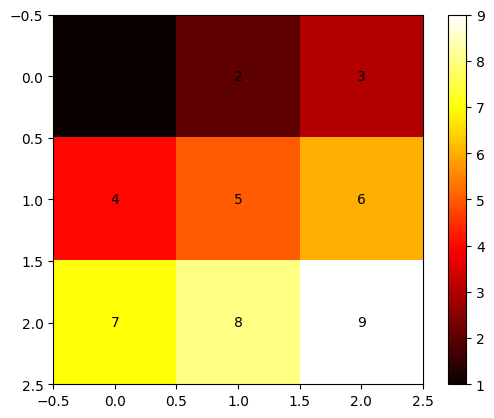

In [5]:
import matplotlib.pyplot as plt
import numpy as np


data = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

fig, ax = plt.subplots()
cax = ax.imshow(data, cmap="hot", interpolation="nearest")


cbar = fig.colorbar(cax)


for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        ax.text(j, i, data[i, j], ha='center', va='center', color='black')

plt.show()


In [ ]:
def decimal_to_binary(array_list, precision_bits_list):

    """
    Convert a list of 2D NumPy arrays to a list of binary strings.

    Args:
        - array_list (list of numpy.ndarray): List of input 2D arrays of float or int values.
        - precision_bits_list (list of tuple): List of tuples containing (min_val, max_val, bits) to define the precision for each array.
            - min_val (float): The minimum possible value of the original range for the element.
            - max_val (float): The maximum possible value of the original range for the element.
            - bits (int): The number of bits used to represent the element in the binary string.

    Returns:
        - binary_strings (list of str): List of binary strings representing the arrays.
    """

    binary_strings = []

    for array, precision_bits in zip(array_list, precision_bits_list):

        min_val, max_val, bits = precision_bits

        binary_string = ''.join(
            f"{int((val - min_val) / (max_val - min_val) * ((1 << bits) - 1)):0{bits}b}"
            for sub_array in array for val in sub_array
        )

        binary_strings.append(binary_string)

    return binary_strings


In [7]:
def select_parents(population, fitness_scores):
    """
    Select parents for the next generation based on their fitness scores.
    using Fitness Proportionate Selection (Roulette Wheel Selection) method.

    Args:
        - population (list of str): The current population of individuals, each represented as a binary string.
        - fitness_scores (list of float): The fitness scores of the individuals in the population.

    Returns:
        selected (list) : The selected parents for the next generation.
    """
    
    probabilities = fitness_scores / np.sum(fitness_scores)

    selected = np.random.choice(population, size=len(population), p=probabilities)

    return selected


pop = [
    ['011011001', '0001100110010', '00110011111111'], 
    ['0111111010011001', '000110010011100110010', '00110010010111111111'],
    ['011111111001', '0011100110010', '0011111'],
    ['01111111101111110011111110011001', '0001100110111001100001100110011100110010', '0011001100010011001001100110010111111111'],
    ['01111111101111110011111110011001', '0001100110111001100001100110011100110010', '0011001100010011001001100110010111111111'],
    ['01111111101111110011111110011001', '0001100110111001100001100110011100110010', '0011001100010011001001100110010111111111']
]
f = [3, 4, 5, 10, 12, 1]
p = select_parents(pop, f)
p

ValueError: a must be 1-dimensional

In [10]:
import numpy as np

def select_parents(population, fitness_scores):
    """
    Select parents for the next generation based on their fitness scores
    using the Fitness Proportionate Selection (Roulette Wheel Selection) method.

    Args:
        population (list of list of str): The current population of individuals, each represented as a binary string.
        fitness_scores (list of float): The fitness scores of the individuals in the population.

    Returns:
        selected (list): The selected parents for the next generation.
    """
    
    probabilities = np.array(fitness_scores) / np.sum(fitness_scores)

    selected_indices = np.random.choice(len(population), size=len(population), p=probabilities)
    selected = [population[i] for i in selected_indices]

    return selected

pop = [
    ['011011001', '0001100110010', '00110011111111'], 
    ['0111111010011001', '000110010011100110010', '00110010010111111111'],
    ['011111111001', '0011100110010', '0011111'],
    ['01111111101111110011111110011001', '0001100110111001100001100110011100110010', '0011001100010011001001100110010111111111'],
    ['01111111101111110011111110011001', '0001100110111001100001100110011100110010', '0011001100010011001001100110010111111111'],
    ['01111111101111110011111110011001', '0001100110111001100001100110011100110010', '0011001100010011001001100110010111111111']
]
f = [3, 4, 5, 10, 12, 1]
p = np.array(select_parents(pop, f))
print(p)


[['01111111101111110011111110011001'
  '0001100110111001100001100110011100110010'
  '0011001100010011001001100110010111111111']
 ['01111111101111110011111110011001'
  '0001100110111001100001100110011100110010'
  '0011001100010011001001100110010111111111']
 ['01111111101111110011111110011001'
  '0001100110111001100001100110011100110010'
  '0011001100010011001001100110010111111111']
 ['011111111001' '0011100110010' '0011111']
 ['01111111101111110011111110011001'
  '0001100110111001100001100110011100110010'
  '0011001100010011001001100110010111111111']
 ['01111111101111110011111110011001'
  '0001100110111001100001100110011100110010'
  '0011001100010011001001100110010111111111']]


In [11]:
o = np.random.choice(p)

ValueError: a must be 1-dimensional

In [12]:
def select_parents(population, fitness_scores):
    """
    Select parents for the next generation based on their fitness scores
    using the Fitness Proportionate Selection (Roulette Wheel Selection) method.

    Args:
        population (list of list of str): The current population of individuals, each represented as a binary string.
        fitness_scores (list of float): The fitness scores of the individuals in the population.

    Returns:
        selected (list): The selected parents for the next generation.
    """

    total_fitness = np.sum(fitness_scores)

    if total_fitness == 0:
        probabilities = np.ones(len(fitness_scores)) / len(fitness_scores)
    else:
        probabilities = np.array(fitness_scores) / total_fitness

    selected_indices = np.random.choice(len(population), size=len(population), p=probabilities)
    selected = [population[i] for i in selected_indices]

    return selected

pop = [
    ['011011001', '0001100110010', '00110011111111'], 
    ['0111111010011001', '000110010011100110010', '00110010010111111111'],
    ['011111111001', '0011100110010', '0011111'],
    ['01111111101111110011111110011001', '0001100110111001100001100110011100110010', '0011001100010011001001100110010111111111'],
    ['01111111101111110011111110011001', '0001100110111001100001100110011100110010', '0011001100010011001001100110010111111111'],
    ['01111111101111110011111110011001', '0001100110111001100001100110011100110010', '0011001100010011001001100110010111111111']
]
f = [3, 4, 5, 10, 12, 1]
p = select_parents(pop, f)
print(p)


[['01111111101111110011111110011001', '0001100110111001100001100110011100110010', '0011001100010011001001100110010111111111'], ['011111111001', '0011100110010', '0011111'], ['011111111001', '0011100110010', '0011111'], ['01111111101111110011111110011001', '0001100110111001100001100110011100110010', '0011001100010011001001100110010111111111'], ['01111111101111110011111110011001', '0001100110111001100001100110011100110010', '0011001100010011001001100110010111111111'], ['011111111001', '0011100110010', '0011111']]


In [14]:
def decimal_to_binary(array_list, precision_bits_list):

    """
    Convert a list of 2D NumPy arrays to a list of binary strings.

    Args:
        - array_list (list of numpy.ndarray): List of input 2D arrays of float or int values.
        - precision_bits_list (list of tuple): List of tuples containing (min_val, max_val, bits) to define the precision for each array.
            - min_val (float): The minimum possible value of the original range for the element.
            - max_val (float): The maximum possible value of the original range for the element.
            - bits (int): The number of bits used to represent the element in the binary string.

    Returns:
        - binary_strings (list of str): List of binary strings representing the arrays.
    """

    binary_strings = []

    for array, precision_bits in zip(array_list, precision_bits_list):

        min_val, max_val, bits = precision_bits

        binary_string = ''.join(
            f"{int((val - min_val) / (max_val - min_val) * ((1 << bits) - 1)):0{bits}b}"
            for sub_array in array for val in sub_array
        )

        binary_strings.append(binary_string)

    return binary_strings




def binary_to_decimal(binary_string_list, precision_bits_list, shapes):
    """
    Convert a list of binary strings back to a list of 2D NumPy arrays.

    Args:
        - binary_string_list (list of str): List of binary strings to be converted.
        - precision_bits_list (list of tuple): List of tuples containing (min_val, max_val, bits) to define the precision for each array.
            - min_val (float): The minimum possible value of the original range for the element.
            - max_val (float): The maximum possible value of the original range for the element.
            - bits (int): The number of bits used to represent the element in the binary string.
        - shapes (list of tuple): List of shapes for the original arrays.

    Returns:
        - arrays (list of numpy.ndarray): List of arrays of float or int values represented by the binary strings.
    """

    arrays = []

    for binary_string, precision_bits, shape in zip(binary_string_list, precision_bits_list, shapes):

        min_val, max_val, bits = precision_bits
        array = []
        index = 0

        for _ in range(shape[0]):

            row = []

            for _ in range(shape[1]):

                segment = binary_string[index:index + bits]
                int_value = int(segment, 2)
                max_int_value = (1 << bits) - 1
                real_value = min_val + (max_val - min_val) * (int_value / max_int_value)
                row.append(real_value)
                index += bits
            array.append(row)

        arrays.append(np.array(array))

    return arrays


pop = [
    ['01111111101111110011111110011001', '0001100110111001100001100110011100110010', '001100110001001100100110011001011111111100000000'],
    ['01111111101111110011111110011001', '0001100110111001100001100110011100110010', '001100110001001100100110011001011111111100000000'],
    ['01111111101111110011111110011001', '0001100110111001100001100110011100110010', '001100110001001100100110011001011111111100000000'],
    ['01111111101111110011111110011001', '0001100110111001100001100110011100110010', '001100110001001100100110011001011111111100000000']  
]
pre = [(0, 1, 8), (0, 1, 8), (0, 1, 8)]
sh = [(2, 2), (1, 5), (3, 2)]

dec = binary_to_decimal(pop, pre, sh)
dec


TypeError: int() can't convert non-string with explicit base

In [15]:
import numpy as np

def binary_to_decimal(binary_string_list, precision_bits_list, shapes):
    """
    Convert a list of binary strings back to a list of 2D NumPy arrays.

    Args:
        binary_string_list (list of str): List of binary strings to be converted.
        precision_bits_list (list of tuple): List of tuples containing (min_val, max_val, bits) to define the precision for each array.
            - min_val (float): The minimum possible value of the original range for the element.
            - max_val (float): The maximum possible value of the original range for the element.
            - bits (int): The number of bits used to represent the element in the binary string.
        shapes (list of tuple): List of shapes for the original arrays.

    Returns:
        arrays (list of numpy.ndarray): List of arrays of float or int values represented by the binary strings.
    """

    arrays = []

    for binary_string, precision_bits, shape in zip(binary_string_list, precision_bits_list, shapes):
        min_val, max_val, bits = precision_bits

        binary_2d = np.array([list(segment) for segment in binary_string])

        int_values = binary_2d.astype(int)

        max_int_value = (1 << bits) - 1

        real_values = min_val + (max_val - min_val) * int_values / max_int_value

       
        array = real_values.reshape(shape)

        arrays.append(array)

    return arrays


pop = [
    ['01111111101111110011111110011001', '0001100110111001100001100110011100110010', '001100110001001100100110011001011111111100000000'],
    ['01111111101111110011111110011001', '0001100110111001100001100110011100110010', '001100110001001100100110011001011111111100000000'],
    ['01111111101111110011111110011001', '0001100110111001100001100110011100110010', '001100110001001100100110011001011111111100000000'],
    ['01111111101111110011111110011001', '0001100110111001100001100110011100110010', '001100110001001100100110011001011111111100000000']  
]
pre = [(0, 1, 8), (0, 1, 8), (0, 1, 8)]
sh = [(2, 2), (1, 5), (3, 2)]

dec = binary_to_decimal(pop, pre, sh)
print(dec)


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.

In [16]:
def binary_to_decimal(binary_string_list, precision_bits_list, shapes):
    """
    Convert a list of binary strings back to a list of 2D NumPy arrays.

    Args:
        binary_string_list (list of str): List of binary strings to be converted.
        precision_bits_list (list of tuple): List of tuples containing (min_val, max_val, bits) to define the precision for each array.
            - min_val (float): The minimum possible value of the original range for the element.
            - max_val (float): The maximum possible value of the original range for the element.
            - bits (int): The number of bits used to represent the element in the binary string.
        shapes (list of tuple): List of shapes for the original arrays.

    Returns:
        arrays (list of numpy.ndarray): List of arrays of float or int values represented by the binary strings.
    """

    arrays = []

    for binary_string, precision_bits, shape in zip(binary_string_list, precision_bits_list, shapes):
        min_val, max_val, bits = precision_bits

        array = []
        index = 0

        for _ in range(shape[0]):

            row = []

            for _ in range(shape[1]):

                segment = binary_string[index:index + bits]
                print(f"Segment: {segment}, Binary String: {binary_string}, Index: {index}, Bits: {bits}")
                int_value = int(segment, 2)
                max_int_value = (1 << bits) - 1
                real_value = min_val + (max_val - min_val) * (int_value / max_int_value)
                row.append(real_value)
                index += bits
            
            array.append(row)

        arrays.append(np.array(array))

    return arrays

pop = [
    ['01111111101111110011111110011001', '0001100110111001100001100110011100110010', '001100110001001100100110011001011111111100000000'],
    ['01111111101111110011111110011001', '0001100110111001100001100110011100110010', '001100110001001100100110011001011111111100000000'],
    ['01111111101111110011111110011001', '0001100110111001100001100110011100110010', '001100110001001100100110011001011111111100000000'],
    ['01111111101111110011111110011001', '0001100110111001100001100110011100110010', '001100110001001100100110011001011111111100000000']  
]
pre = [(0, 1, 8), (0, 1, 8), (0, 1, 8)]
sh = [(2, 2), (1, 5), (3, 2)]

dec = binary_to_decimal(pop, pre, sh)
print(dec)


Segment: ['01111111101111110011111110011001', '0001100110111001100001100110011100110010', '001100110001001100100110011001011111111100000000'], Binary String: ['01111111101111110011111110011001', '0001100110111001100001100110011100110010', '001100110001001100100110011001011111111100000000'], Index: 0, Bits: 8


TypeError: int() can't convert non-string with explicit base

In [5]:
pop = ['01111111101111110011111110011001', '0001100110111001100001100110011100110010', '001100110001001100100110011001011111111100000000']
print(len(pop[0]))
max_fitness = sum([len(sub_target) for sub_target in pop])
print(max_fitness)

32
120


In [11]:
def compute_fitness(population, target):
    """
    Compute the fitness value for each individual in the population.

    Args:
        population (list of str): The population of individuals, each represented as a binary string.
        target (str): The target binary string to compare against.

    Returns:
        fitness_values (list of float): A list of fitness values, one for each individual in the population.
    """
    fitness_values = []

    for individual in population:
        fitness = sum(1 for i, j in zip(individual, target) if i == j)
        fitness_values.append(fitness)

    return fitness_values

pop = ['01111111101111110011111110011001', '0001100110111001100001100110011100110010', '001100110001001100100110011001011111111100000000',
       '01111111101111110011111110011001', '0001100110111001100001100110011100110010', '001100110001001100100110011001011111111100000000',
       '01111111101111110011111110011001', '0001100110111001100001100110011100110010', '001100110001001100100110011001011111111100000000',
       '01111111101111110011111110011001', '0001100110111001100001100110011100110010', '001100110001001100100110011001011111111100000000']
t = ["01111111101111110011111110011001"]

ft = compute_fitness(pop, t[0])
print(ft)

[32, 14, 16, 32, 14, 16, 32, 14, 16, 32, 14, 16]


In [8]:
def decimal_to_binary(array_list, precision_bits_list):

    """
    Convert a list of 2D NumPy arrays to a list of binary strings.

    Args:
        - array_list (list of numpy.ndarray): List of input 2D arrays of float or int values.
        - precision_bits_list (list of tuple): List of tuples containing (min_val, max_val, bits) to define the precision for each array.
            - min_val (float): The minimum possible value of the original range for the element.
            - max_val (float): The maximum possible value of the original range for the element.
            - bits (int): The number of bits used to represent the element in the binary string.

    Returns:
        - binary_strings (list of str): List of binary strings representing the arrays.
    """

    binary_strings = []

    for array, precision_bits in zip(array_list, precision_bits_list):

        min_val, max_val, bits = precision_bits

        binary_string = ''.join(
            f"{int((val - min_val) / (max_val - min_val) * ((1 << bits) - 1)):0{bits}b}"
            for sub_array in array for val in sub_array
        )

        binary_strings.append(binary_string)

    return binary_strings

t = [np.array([[2,3,4], [1,2,3]])]
i = [(0, 10, 10)]
u = decimal_to_binary(t, i)
u

['001100110001001100100110011001000110011000110011000100110010']

In [12]:
ui = u[0]
ui

'001100110001001100100110011001000110011000110011000100110010'

In [13]:
import numpy as np

def decimal_to_binary(array_list, precision_bits_list):
    """
    Convert a list of 2D NumPy arrays to a list of binary strings.

    Args:
        - array_list (list of numpy.ndarray): List of input 2D arrays of float or int values.
        - precision_bits_list (list of tuple): List of tuples containing (min_val, max_val, bits) to define the precision for each array.
            - min_val (float): The minimum possible value of the original range for the element.
            - max_val (float): The maximum possible value of the original range for the element.
            - bits (int): The number of bits used to represent the element in the binary string.

    Returns:
        - binary_strings (list of str): List of binary strings representing the arrays.
    """

    binary_strings = []

    for array, precision_bits in zip(array_list, precision_bits_list):

        min_val, max_val, bits = precision_bits

        if max_val == min_val:
            
            binary_string = ''.join(
                '0' * bits
                for sub_array in array for val in sub_array
            )
        else:
            binary_string = ''.join(
                f"{int((val - min_val) / (max_val - min_val) * ((1 << bits) - 1)):0{bits}b}"
                if not np.isnan(val) else '0' * bits  
                for sub_array in array for val in sub_array
            )

        binary_strings.append(binary_string)

    return binary_strings


arrays = [
    np.array([[0.5, 0.75], [0.25, 0.0]]),
    np.array([[0.1, 0.9], [0.2, 0.8]]),
    np.array([[np.nan, 0.5], [0.75, 0.25]])
]
precision_bits = [(0, 1, 8), (0, 1, 8), (0, 1, 8)]

binary_strings = decimal_to_binary(arrays, precision_bits)
print(binary_strings)


['01111111101111110011111100000000', '00011001111001010011001111001100', '00000000011111111011111100111111']


In [23]:
import h5py
import os


def save_results(result_path, file_name, elite_chromosomes, best_fitness, simulation_duration, population):

    """
    Save simulation results to an HDF5 file.

    Args:
        result_path (str): The directory where the results file will be saved.
        file_name (str): The name of the results file (without extension).
        elite_chromosomes (list or np.ndarray): The elite chromosomes from the simulation.
        best_fitness (list or np.ndarray): The best fitness values over the generations.
        simulation_duration (list): a list containing duration of each generation of the simulation.
        population (list or np.ndarray): The final population at the end of the simulation.
    """

    if not os.path.exists(result_path):
        os.makedirs(result_path)

    full_path = os.path.join(result_path, f"{file_name}.h5")

    with h5py.File(full_path, "w") as file:
       
        elite_group = file.create_group("elite_chromosomes")
        for i, (generation, chromosomes) in enumerate(elite_chromosomes):
            gen_group = elite_group.create_group(f"generation_{i}")
            for j, chromosome in enumerate(chromosomes):
                gen_group.create_dataset(f"chromosome_{j}", data=chromosome)
        
        file.create_dataset(name="best_fitness", data=best_fitness)
        file.create_dataset(name="simulation_duration", data=simulation_duration)
        file.create_dataset(name="final_population", data=population)



In [24]:
elite_chromosomes = {1: [np.array([1,2,3]), np.array([7,8,7])], 3:[np.array([1,2,3]), np.array([7,8,7])]} # a dictionary to store the best chromosome of each generation
best_fitness = [12,34,55,66]  # a list to store the best fitness of each generation
simulation_duration = [22,22,2,2,22222,566]  # a list to store the duration of each generation in seconds
population = [["10111111111111", "222222222222222", "22222222222"], ["222222222", "2222222222", "1111111111"]]

save_results(
        result_path="/home/samani/Documents/sim/",
        file_name="file_name",
        elite_chromosomes=elite_chromosomes,
        best_fitness=best_fitness,
        simulation_duration=simulation_duration,
        population=population
    )


TypeError: cannot unpack non-iterable int object

In [25]:
import h5py
import os
import numpy as np

def save_results(result_path, file_name, elite_chromosomes, best_fitness, simulation_duration, population):

    """
    Save simulation results to an HDF5 file.

    Args:
        result_path (str): The directory where the results file will be saved.
        file_name (str): The name of the results file (without extension).
        elite_chromosomes (list or np.ndarray): The elite chromosomes from the simulation.
        best_fitness (list or np.ndarray): The best fitness values over the generations.
        simulation_duration (list): a list containing duration of each generation of the simulation.
        population (list or np.ndarray): The final population at the end of the simulation.
    """

    if not os.path.exists(result_path):
        os.makedirs(result_path)

    full_path = os.path.join(result_path, f"{file_name}.h5")

    with h5py.File(full_path, "w") as file:
        
        elite_group = file.create_group("elite_chromosomes")
        for i, (generation, chromosomes) in enumerate(elite_chromosomes):
            gen_group = elite_group.create_group(f"generation_{i}")
            for j, chromosome in enumerate(chromosomes):
                gen_group.create_dataset(f"chromosome_{j}", data=chromosome)
        
        file.create_dataset(name="best_fitness", data=best_fitness)
        file.create_dataset(name="simulation_duration", data=simulation_duration)
        file.create_dataset(name="final_population", data=population)

elite_chromosomes = [("generation",[np.array([1,2,3]), np.array([9,8,7])]), ("generation",[np.array([1,2,3]), np.array([9,8,7])])] # a dictionary to store the best chromosome of each generation
best_fitness = [12, 34, 55, 66]  # a list to store the best fitness of each generation
simulation_duration = [22, 22, 2, 2, 22222, 566]  # a list to store the duration of each generation in seconds
population = [["10111111111111", "222222222222222", "22222222222"], ["222222222", "2222222222", "1111111111"]]

save_results(
    result_path="/home/samani/Documents/sim/",
    file_name="file_name",
    elite_chromosomes=elite_chromosomes,
    best_fitness=best_fitness,
    simulation_duration=simulation_duration,
    population=population
)


In [26]:
import h5py
import os
import numpy as np

def save_results(result_path, file_name, elite_chromosomes, best_fitness, simulation_duration, population):
    """
    Save simulation results to an HDF5 file.

    Args:
        result_path (str): The directory where the results file will be saved.
        file_name (str): The name of the results file (without extension).
        elite_chromosomes (list or np.ndarray): The elite chromosomes from the simulation.
        best_fitness (list or np.ndarray): The best fitness values over the generations.
        simulation_duration (list): a list containing duration of each generation of the simulation.
        population (list or np.ndarray): The final population at the end of the simulation.
    """

    if not os.path.exists(result_path):
        os.makedirs(result_path)

    full_path = os.path.join(result_path, f"{file_name}.h5")

    with h5py.File(full_path, "w") as file:
       
        elite_chromosomes_group = file.create_group("elite_chromosomes")
        for i, generation in enumerate(elite_chromosomes):
            gen_group = elite_chromosomes_group.create_group(f"generation_{i}")
            for j, chromosome in enumerate(generation):
                gen_group.create_dataset(f"chromosome_{j}", data=np.array(chromosome, dtype=np.float32))

        file.create_dataset(name="best_fitness", data=best_fitness)
        file.create_dataset(name="simulation_duration", data=simulation_duration)
        file.create_dataset(name="final_population", data=np.array(population, dtype=h5py.string_dtype()))


elite_chromosomes = [
    [np.array([1,2,3]), np.array([9,8,7])],
    [np.array([4,5,6]), np.array([6,5,4])]
]
best_fitness = [12, 34, 55, 66]
simulation_duration = [22, 22, 2, 2, 22222, 566]
population = [["10111111111111", "222222222222222", "22222222222"], ["222222222", "2222222222", "1111111111"]]


save_results(
    result_path="/home/samani/Documents/sim/",
    file_name="file_name",
    elite_chromosomes=elite_chromosomes,
    best_fitness=best_fitness,
    simulation_duration=simulation_duration,
    population=population
)


In [27]:
import numpy as np


arr = np.array([[1, 2, np.nan], [4, np.nan, 6]])


nan_indices = np.isnan(arr)


num_nan = np.sum(nan_indices)


if num_nan > 0:
    print("There are NaN values in the array.")
   
    nan_indices_tuple = np.where(nan_indices)
    print("Indices of NaN values:", nan_indices_tuple)
else:
    print("No NaN values in the array.")


There are NaN values in the array.
Indices of NaN values: (array([0, 1]), array([2, 1]))


In [32]:
l = ["1010110110", "1000000001", "12222222222222222222", "22222222222222222"]


del l[1]

print(l)  


['1010110110', '12222222222222222222', '22222222222222222']


In [33]:
del l[0]
print(l)

['12222222222222222222', '22222222222222222']


In [39]:
p = [1,2,2,2,2]
f = [12, 1, 20, 13, 2]
pro = [r/sum(f) for r in f]

s = np.random.choice(len(p), size=8, p=pro)
s

array([3, 2, 0, 0, 2, 0, 2, 3])

In [41]:
import numpy as np

def select_parents_tournament(population, fitness_scores, population_size, tournament_size=3):
    """
    Select parents for the next generation based on their fitness scores
    using the Tournament Selection method.

    Args:
        population (list of list of str): The current population of individuals, each represented as a binary string.
        fitness_scores (list of float): The fitness scores of the individuals in the population.
        population_size (int): Number of chromosomes in the original population.
        tournament_size (int, optional): The number of individuals to participate in each tournament. Defaults to 3.

    Returns:
        selected (list): The selected parents for the next generation.
    """
    selected = []
    
    for _ in range(population_size):
       
        tournament_indices = np.random.choice(len(population), size=tournament_size, replace=False)
        tournament_fitness = [fitness_scores[i] for i in tournament_indices]
        
        best_index = tournament_indices[np.argmax(tournament_fitness)]
        
        selected.append(population[best_index])
    
    return selected


population = [
    ['0', '1', '1', '0', '1', '0'],
    ['1', '0', '1', '0', '0', '1'],
    ['1', '1', '0', '1', '1', '0'],
    ['0', '0', '1', '1', '0', '1'],
    ['1', '1', '1', '0', '0', '0'],
]
fitness_scores = [10, 20, 15, 5, 25]
population_size = 15

selected_parents = select_parents_tournament(population, fitness_scores, population_size, tournament_size=3)
print("Selected Parents:")
for parent in selected_parents:
    print(parent)


Selected Parents:
['1', '1', '0', '1', '1', '0']
['1', '0', '1', '0', '0', '1']
['1', '1', '0', '1', '1', '0']
['1', '1', '1', '0', '0', '0']
['1', '1', '1', '0', '0', '0']
['1', '1', '1', '0', '0', '0']
['1', '0', '1', '0', '0', '1']
['1', '0', '1', '0', '0', '1']
['1', '1', '1', '0', '0', '0']
['1', '1', '1', '0', '0', '0']
['1', '1', '1', '0', '0', '0']
['1', '1', '1', '0', '0', '0']
['1', '1', '1', '0', '0', '0']
['1', '1', '1', '0', '0', '0']
['1', '1', '1', '0', '0', '0']


In [47]:
p = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
p.remove(1)


In [48]:
p

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [49]:
p.remove(2)

In [50]:
p

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [1]:
from numba import jit


@jit
def diffusion1(specie, length, width, k_diff, dt, compartment_length, compartment_width):

    if length == 0 and width == 0:
        specie[length, width] = lower_left_corner_diff(
            specie=specie,
            length=length,
            depth=width,
            k_diff=k_diff,
            dt=dt
        )

    elif length == compartment_length-1 and width == 0:
        specie[length, width] = lower_right_corner_diff(
            specie=specie,
            length=length,
            depth=width,
            k_diff=k_diff,
            dt=dt
        )

    elif length == 0 and width == compartment_width-1:
        specie[length, width] = upper_left_corner_diff(
            specie=specie,
            length=length,
            depth=width,
            k_diff=k_diff,
            dt=dt
        )

    elif length == compartment_length-1 and width == compartment_width-1:
        specie[length, width] = upper_right_corner_diff(
            specie=specie,
            length=length,
            depth=width,
            k_diff=k_diff,
            dt=dt
        )

    elif width == 0 and length != 0 and length != compartment_length-1:
        specie[length, width] = lower_side_diff(
            specie=specie,
            length=length,
            depth=width,
            k_diff=k_diff,
            dt=dt
        )

    elif length == 0 and width != 0 and width != compartment_width-1:
        specie[length, width] = left_side_diff(
            specie=specie,
            length=length,
            depth=width,
            k_diff=k_diff,
            dt=dt
        )

    elif length == compartment_length-1 and width != 0 and width != compartment_width-1:
        specie[length, width] = right_side_diff(
            specie=specie,
            length=length,
            depth=width,
            k_diff=k_diff,
            dt=dt
        )

    elif width == compartment_width-1 and length != 0 and length != compartment_length-1:
        specie[length, width] = upper_side_diff(
            specie=specie,
            length=length,
            depth=width,
            k_diff=k_diff,
            dt=dt
        )

    else:
        specie[length, width] = central_diffusion(
            specie=specie,
            length=length,
            depth=width,
            k_diff=k_diff,
            dt=dt
        )

    return specie[length, width]


@jit
def lower_side_diff(specie, length, depth, k_diff, dt):

    specie[length, depth] = (specie[length, depth]+
                             (dt*k_diff*(specie[length+1, depth]+specie[length-1, depth]+specie[length, depth+1]-(specie[length, depth]*3))))

    return specie[length, depth]


@jit
def upper_side_diff(specie, length, depth, k_diff, dt):

    specie[length, depth] = (specie[length, depth]+
                             (dt*k_diff*(specie[length+1, depth]+specie[length-1, depth]+specie[length, depth-1]-(specie[length, depth]*3))))

    return specie[length, depth]


@jit
def left_side_diff(specie, length, depth, k_diff, dt):

    specie[length, depth] = (specie[length, depth]+
                             (dt*k_diff*(specie[length+1, depth]+specie[length, depth+1]+specie[length, depth-1]-(specie[length, depth]*3))))

    return specie[length, depth]


@jit
def right_side_diff(specie, length, depth, k_diff, dt):

    specie[length, depth] = (specie[length, depth]+
                             (dt*k_diff*(specie[length-1, depth]+specie[length, depth+1] +specie[length, depth-1]-(specie[length, depth] * 3))))

    return specie[length, depth]


@jit
def central_diffusion(specie, length, depth, k_diff, dt):

    specie[length, depth] = (specie[length, depth]+
                             (dt*k_diff*(specie[length+1, depth]+specie[length-1, depth]+specie[length, depth+1]+specie[length, depth-1]-(specie[length, depth]*4))))

    return specie[length, depth]


@jit
def lower_left_corner_diff(specie, length, depth, k_diff, dt):

    specie[length, depth] = (specie[length, depth] +
                             (dt*k_diff*(specie[length+1, depth]+specie[length, depth+1]-(specie[length, depth]*2))))

    return specie[length, depth]


@jit
def lower_right_corner_diff(specie, length, depth, k_diff, dt):

    specie[length, depth] = (specie[length, depth] +
                             (dt*k_diff*(specie[length-1, depth]+specie[length, depth+1]-(specie[length, depth]*2))))

    return specie[length, depth]


@jit
def upper_left_corner_diff(specie, length, depth, k_diff, dt):

    specie[length, depth] = (specie[length, depth] +
                             (dt*k_diff*(specie[length+1, depth]+specie[length, depth-1]-(specie[length, depth]*2))))

    return specie[length, depth]


@jit
def upper_right_corner_diff(specie, length, depth, k_diff, dt):

    specie[length, depth] = (specie[length, depth] +
                             (dt*k_diff*(specie[length-1, depth]+specie[length, depth-1]-(specie[length, depth]*2))))

    return specie[length, depth]


In [23]:
import numpy as np

fM = np.zeros((10, 10))
fM[:, 0] = 2
#fM[:, 1] = 1
print(fM)
com_len = 10
com_wid = 10
k_m_diff = 0.1
dt = 0.01


for i in range(30):
    new_fM = np.zeros_like(fM)
    for length in range(com_len):
        for width in range(com_wid):
            new_fM[length, width] = diffusion1(
                specie=fM,
                length=length,
                width=width,
                k_diff=k_m_diff,
                dt=dt,
                compartment_length=com_len,
                compartment_width=com_wid
            )
    fM = new_fM

print(fM[:, 8])

[[2. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[7.30398270e-17 7.36035964e-17 7.36142027e-17 7.36143399e-17
 7.36143413e-17 7.36143413e-17 7.36143413e-17 7.36143413e-17
 7.36143413e-17 7.36143413e-17]


In [12]:
b = np.zeros((10, 1))
b

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [7]:
def crossover(parents1, parents2, crossover_rates, num_crossover_points):

    offspring1 = []
    offspring2 = []

    for parent1, parent2, crossover_rate, num_points in zip(parents1, parents2, crossover_rates, num_crossover_points):

        if random.random() < crossover_rate:

            crossover_points = sorted(random.sample(range(1, len(parent1)), num_points))
            child1, child2 = [], []
            start = 0

            for i, point in enumerate(crossover_points + [len(parent1)]):

                if i % 2 == 0:

                    child1.extend(parent1[start:point])
                    child2.extend(parent2[start:point])

                else:

                    child1.extend(parent2[start:point])
                    child2.extend(parent1[start:point])

                start = point

            offspring1.append(''.join(child1))
            offspring2.append(''.join(child2))

        else:

            offspring1.append(parent1)
            offspring2.append(parent2)

    return offspring1, offspring2


def mutate(chromosome, mutation_rates):

    mutated_chromosome = []

    for sub_chromosome, mutation_rate in zip(chromosome, mutation_rates):

        mutated_sub_chromosome = ''.join(
            '1' if bit == '0' and random.random() <= mutation_rate else
            '0' if bit == '1' and random.random() <= mutation_rate else
            bit
            for bit in sub_chromosome
        )

        mutated_chromosome.append(mutated_sub_chromosome)

    return mutated_chromosome


In [12]:
p1 = ["111111111111111111", "11111111111111111", "11111111111111111", "111111111111111111111111"]
p2 = ["000000000000000000", "00000000000000000", "00000000000000000", "000000000000000000000000"]


of1, of2 = crossover(parents1=p1, parents2=p2, crossover_rates=[0.85, 0.90, 0.87, 0.79], num_crossover_points=[2,2,1,2,1])
print(of1)
print(of2)

['100000000011111111', '11111111111100011', '11111111111000000', '111111111000000000001111']
['011111111100000000', '00000000000011100', '00000000000111111', '000000000111111111110000']


In [13]:
of1_1 = mutate(chromosome=of1, mutation_rates=[0.01, 0.2,0.4,0.5])
of2_1 = mutate(chromosome=of2, mutation_rates=[0.02, 0.3, 0.1, 0.1])
print(of1_1)
print(of2_1)

['100000000011111111', '11111110111000011', '00110011000101100', '001011010001101011110000']
['001111111100100000', '00001000010111110', '00000100101100111', '000000000111011111110000']


In [18]:
def initialize_population(pop_size, bit_length):

    population = [''.join(random.choice('01') for _ in range(bit_length)) for _ in range(pop_size)]

    return population





def create_population(sp1, sp2, sp1_cells, sp2_cells, params):

    population = [[sp1[i], sp2[i], sp1_cells[i], sp2_cells[i], params[i]] for i in range(len(sp1))]

    return population






def genetic_algorithm(population_size, specie_matrix_shape, precision_bits, num_params, generations, mutation_rates,
                      crossover_rates, num_crossover_points, target, target_precision_bits, result_path,
                      selection_method="roulette", tournament_size=5, file_name="sim_result", dt=0.01, sim_start=0,
                      sim_stop=5, epochs=500, fitness_trigger=None):

    elite_chromosome = []  # list to store the best chromosome
    best_fitness = []  # list to store the best fitness of each generation
    simulation_duration = []  # list to store the duration of each generation in seconds
    best_results = []  # list to store the best result of each generation
    print(f"{'=' * 85}")
    print("                             *** Genetic Algorithm ***                               ")
    print(f"{'=' * 85}")

    sp1 = initialize_population(
        pop_size=population_size,
        bit_length=specie_matrix_shape[0] * specie_matrix_shape[1] * precision_bits["sp1"][-1]
    )
    sp2 = initialize_population(
        pop_size=population_size,
        bit_length=specie_matrix_shape[0] * specie_matrix_shape[1] * precision_bits["sp2"][-1]
    )

    sp1_cells = initialize_population(
        pop_size=population_size,
        bit_length=specie_matrix_shape[0] * specie_matrix_shape[1] * precision_bits["sp1_cells"][-1]
    )
    sp2_cells = initialize_population(
        pop_size=population_size,
        bit_length=specie_matrix_shape[0] * specie_matrix_shape[1] * precision_bits["sp2_cells"][-1]
    )
    params = initialize_population(
        pop_size=population_size,
        bit_length=num_params * precision_bits["params"][-1]
    )
    return (sp1, sp2, sp1_cells, sp2_cells, params)


In [26]:
t = np.array([[2,3], [3,4]])
p = {"sp1": (0, 10, 8), "sp2": (0, 10, 8), "sp1_cells": (0, 10, 8), "sp2_cells": (0, 10, 8), "params": (0, 10, 8)}


r = genetic_algorithm(population_size=3, specie_matrix_shape=(2,2), precision_bits=p, num_params=2, generations=10, mutation_rates=0.01,
                      crossover_rates=0.85, num_crossover_points=[1,1,1,1,1], target=t, target_precision_bits=(0,10, 8), result_path="fff",
                      selection_method="roulette", tournament_size=5, file_name="sim_result", dt=0.01, sim_start=0,
                      sim_stop=5, epochs=500, fitness_trigger=None)


                             *** Genetic Algorithm ***                               


In [27]:
for i in range(len(r)):
    print(r[i])

['00100100110111110001111110111011', '10111110111010101101001011001011', '11011110001011011010111110101000']
['01111101011011000010110101001010', '11110100110001111111110101001101', '10001011001100100000101111000010']
['01111110000010001100011110010011', '10111111010000000100001110001110', '11010001111100000011010111100001']
['00101110110101101110110110000100', '11011010100100101100111011000110', '10100111110010110100010011000111']
['0001011010010000', '1110111011101111', '0000001100011110']


In [53]:
population = create_population(sp1=r[0], sp2=r[1], sp1_cells=r[2], sp2_cells=r[3], params=r[-1])

In [54]:
population

[['00100100110111110001111110111011',
  '01111101011011000010110101001010',
  '01111110000010001100011110010011',
  '00101110110101101110110110000100',
  '0001011010010000'],
 ['10111110111010101101001011001011',
  '11110100110001111111110101001101',
  '10111111010000000100001110001110',
  '11011010100100101100111011000110',
  '1110111011101111'],
 ['11011110001011011010111110101000',
  '10001011001100100000101111000010',
  '11010001111100000011010111100001',
  '10100111110010110100010011000111',
  '0000001100011110']]

In [30]:
def decimal_to_binary(array_list, precision_bits_list):
 
    binary_strings = []

    for array, precision_bits in zip(array_list, precision_bits_list):

        min_val, max_val, bits = precision_bits

        if max_val == min_val:
            # All values will be the same in this case, handle gracefully by converting to '0' * bits
            binary_string = ''.join(
                '0' * bits
                for sub_array in array for val in sub_array
            )
        else:
            binary_string = ''.join(
                f"{int((val - min_val) / (max_val - min_val) * ((1 << bits) - 1)):0{bits}b}"
                if not np.isnan(val) else '0' * bits  # Handle NaN by converting to '0' * bits
                for sub_array in array for val in sub_array
            )

        binary_strings.append(binary_string)

    return binary_strings


bt = decimal_to_binary(array_list=[t], precision_bits_list=[(0, 10, 8)])

In [31]:
bt

['00110011010011000100110001100110']

In [34]:
def binary_to_decimal(binary_string_list, precision_bits_list, shapes):

    arrays = []

    for binary_string, precision_bits, shape in zip(binary_string_list, precision_bits_list, shapes):

        min_val, max_val, bits = precision_bits
        array = []
        index = 0

        for _ in range(shape[0]):

            row = []

            for _ in range(shape[1]):

                segment = binary_string[index:index + bits]
                int_value = int(segment, 2)
                max_int_value = (1 << bits) - 1
                real_value = min_val + (max_val - min_val) * (int_value / max_int_value)
                row.append(real_value)
                index += bits
            array.append(row)

        arrays.append(np.array(array))

    return arrays






precision_bits_list = [p["sp1"], p["sp2"], p["sp1_cells"], p["sp2_cells"], p["sp2_cells"]]

dp = [binary_to_decimal(
            binary_string_list=chromosome,
            precision_bits_list=precision_bits_list,
            shapes=[(2,2), (2,2),(2,2),(2,2), (1, 2)]) 
      for chromosome in population
     ]

In [38]:
print(len(dp))

3


In [43]:
print(dp[2])

[array([[8.70588235, 1.76470588],
       [6.8627451 , 6.58823529]]), array([[5.45098039, 1.96078431],
       [0.43137255, 7.60784314]]), array([[8.19607843, 9.41176471],
       [2.07843137, 8.82352941]]), array([[6.54901961, 7.96078431],
       [2.66666667, 7.80392157]]), array([[0.11764706, 1.17647059]])]


In [52]:
hhh = np.array([[1,2,3,4,5,6]])

print(hhh[0,8])

IndexError: index 8 is out of bounds for axis 1 with size 6

In [56]:

parent1 = random.choice(population)
parent2 = random.choice(population)
population.remove(parent1)
population.remove(parent2)

In [57]:
population

[['11011110001011011010111110101000',
  '10001011001100100000101111000010',
  '11010001111100000011010111100001',
  '10100111110010110100010011000111',
  '0000001100011110']]

In [1]:
import numpy as np

def transpose_convolution(input, filter, padding, stride, output_shape):
    # Extract input and filter dimensions
    input_height, input_width = input.shape
    filter_height, filter_width = filter.shape
    
    # Calculate the shape of the padded input
    padded_height = (input_height - 1) * stride + filter_height
    padded_width = (input_width - 1) * stride + filter_width
    
    # Create the padded input matrix with zeros
    padded_input = np.zeros((padded_height, padded_width))
    
    # Place the input values into the correct positions in the padded input matrix
    for i in range(input_height):
        for j in range(input_width):
            padded_input[i * stride, j * stride] = input[i, j]
    
    # Calculate the output dimensions
    output_height, output_width = output_shape
    
    # Create the output matrix with zeros
    output = np.zeros((output_height, output_width))
    
    # Perform the transpose convolution
    for i in range(output_height):
        for j in range(output_width):
            for m in range(filter_height):
                for n in range(filter_width):
                    if (i - m) >= 0 and (j - n) >= 0 and (i - m) < padded_height and (j - n) < padded_width:
                        output[i, j] += padded_input[i - m, j - n] * filter[m, n]
    
    # Apply padding if needed
    if padding > 0:
        output = output[padding:-padding, padding:-padding]
    
    return output

# Example input
input_matrix = np.array([[1, 3], [2, 4]])
filter_matrix = np.array([[1, 0, 1], [0, 0, 0], [1, 0, 1]])
padding = 1
stride = 2
output_shape = (6, 6)

# Calculate the transpose convolution
output_matrix = transpose_convolution(input_matrix, filter_matrix, padding, stride, output_shape)
print(output_matrix)


[[ 0.  0.  0.  0.]
 [ 0. 10.  0.  7.]
 [ 0.  0.  0.  0.]
 [ 0.  6.  0.  4.]]
